In [153]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import soundfile as sf
import scipy
from scipy.signal import butter, filtfilt

In [235]:
y, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA2r15\p04\d306\d306sA2r15p0420210826.wav", sr=44100)

In [195]:
print(sr)

44100


In [87]:
len(y)

101609

In [137]:
y = y[:int(len(y)/10)]

In [138]:
print(librosa.get_duration(y=y,sr=sr))

0.23038548752834467


In [55]:
y = y[:3000]

In [139]:
hop_time = 0.001  # 10 ms hop length
sr = 22050  # Sampling rate

# Calculate hop length in samples
hop_length = int(round(hop_time * sr))

win_length = int(round(0.02 * sr))

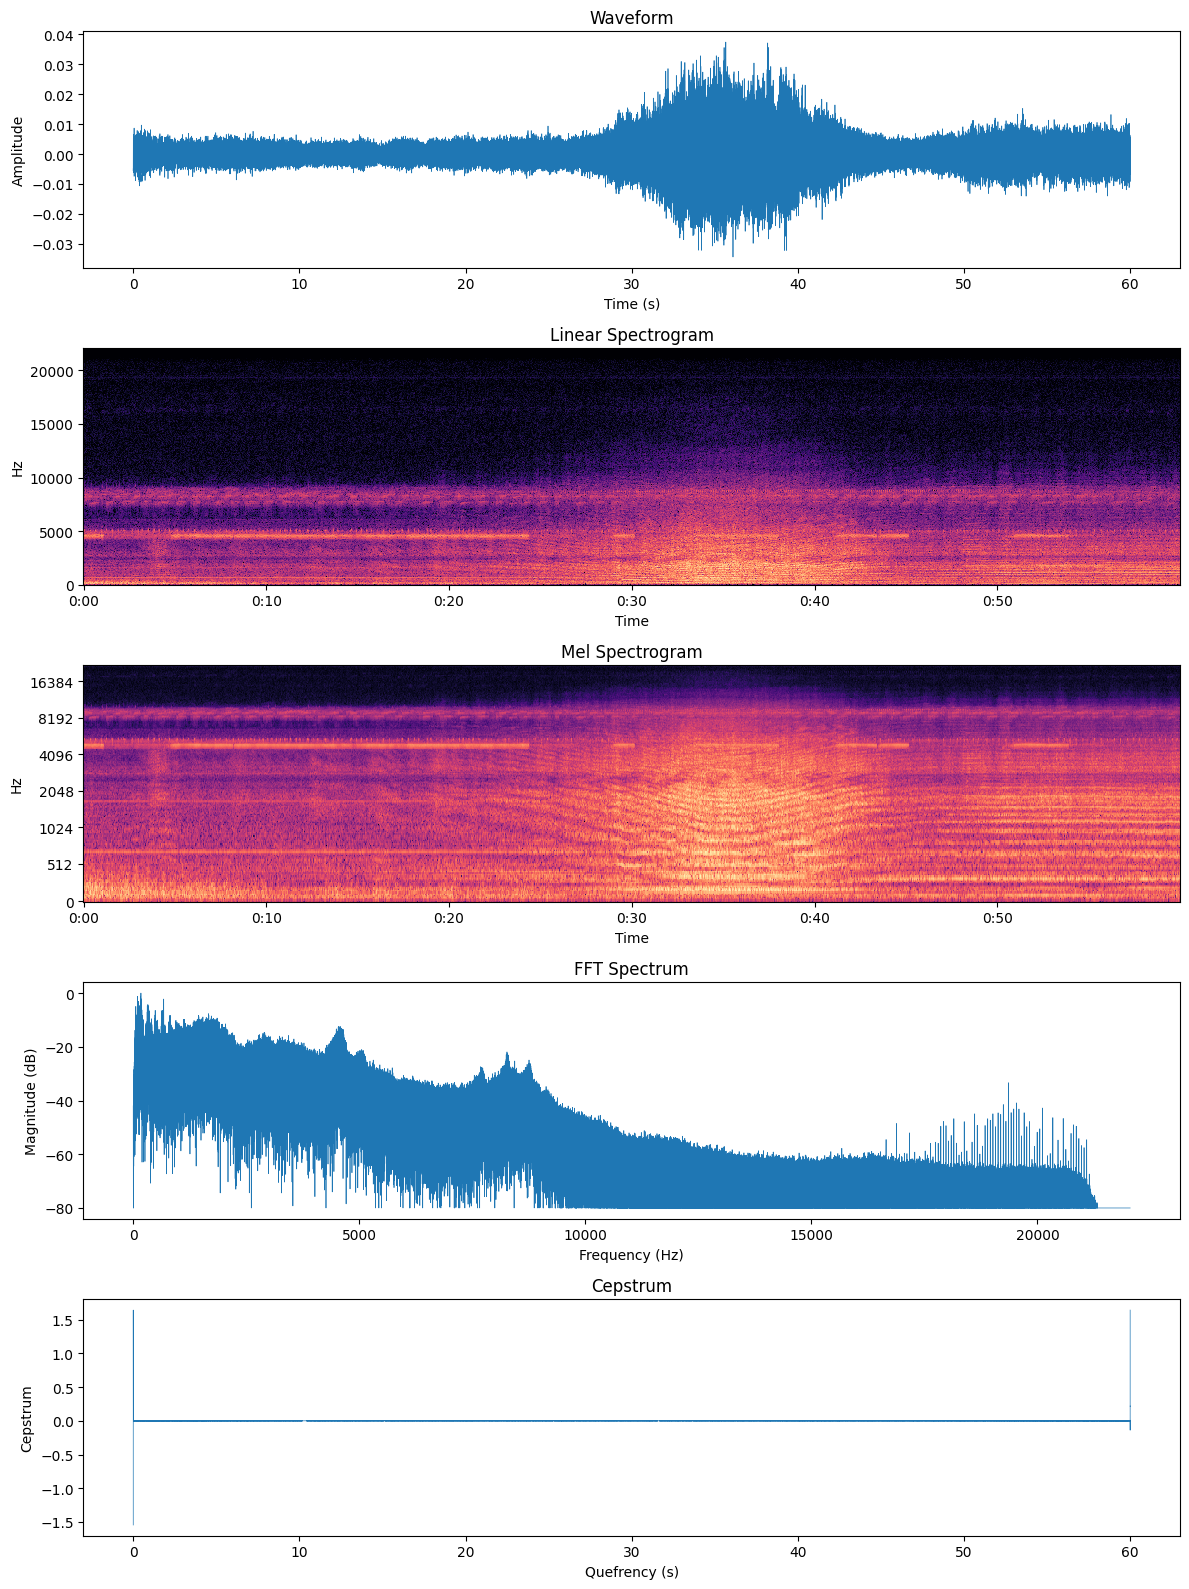

In [236]:
# Calculate time axis for waveform
time = np.arange(0, len(y)) / sr
# Compute spectrogram with linear frequency scale
D_linear = np.abs(librosa.stft(y))
spectrogram_linear = librosa.amplitude_to_db(D_linear, ref=np.max)

# Compute spectrogram with mel scale
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256, fmax=20000)
spectrogram_mel = librosa.power_to_db(S, ref=np.max)

# Compute FFT (Fast Fourier Transform) spectrum
fft = np.fft.fft(y)
fft_freqs = np.fft.fftfreq(len(fft), d=1/sr)
fft_mag = librosa.amplitude_to_db(np.abs(fft), ref=np.max)

# Compute Cepstrum
cepstrum = np.real(np.fft.ifft(np.log(np.abs(fft) + 1e-8)))

# Plotting
plt.figure(figsize=(12, 16))

# Plot waveform
plt.subplot(5, 1, 1)
plt.plot(time, y, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')

# Plot linear spectrogram
plt.subplot(5, 1, 2)
librosa.display.specshow(spectrogram_linear, sr=sr, x_axis='time', y_axis='linear')
plt.title('Linear Spectrogram')

# Plot Mel spectrogram
plt.subplot(5, 1, 3)
librosa.display.specshow(spectrogram_mel, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')

# Plot FFT spectrum
plt.subplot(5, 1, 4)
plt.plot(fft_freqs[:len(fft)//2], fft_mag[:len(fft)//2], linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('FFT Spectrum')

# Plot Cepstrum
plt.subplot(5, 1, 5)
plt.plot(time, cepstrum, linewidth=0.5)
plt.xlabel('Quefrency (s)')
plt.ylabel('Cepstrum')
plt.title('Cepstrum')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [225]:
y = y - filtered_signal_combined

In [317]:
output_file = f"C:\\Users\Alec\Desktop\\featureExtraction\d306sA2r15p04_lowFormantHarmonics.wav"

sf.write(output_file, filtered_signal_combined, sr)

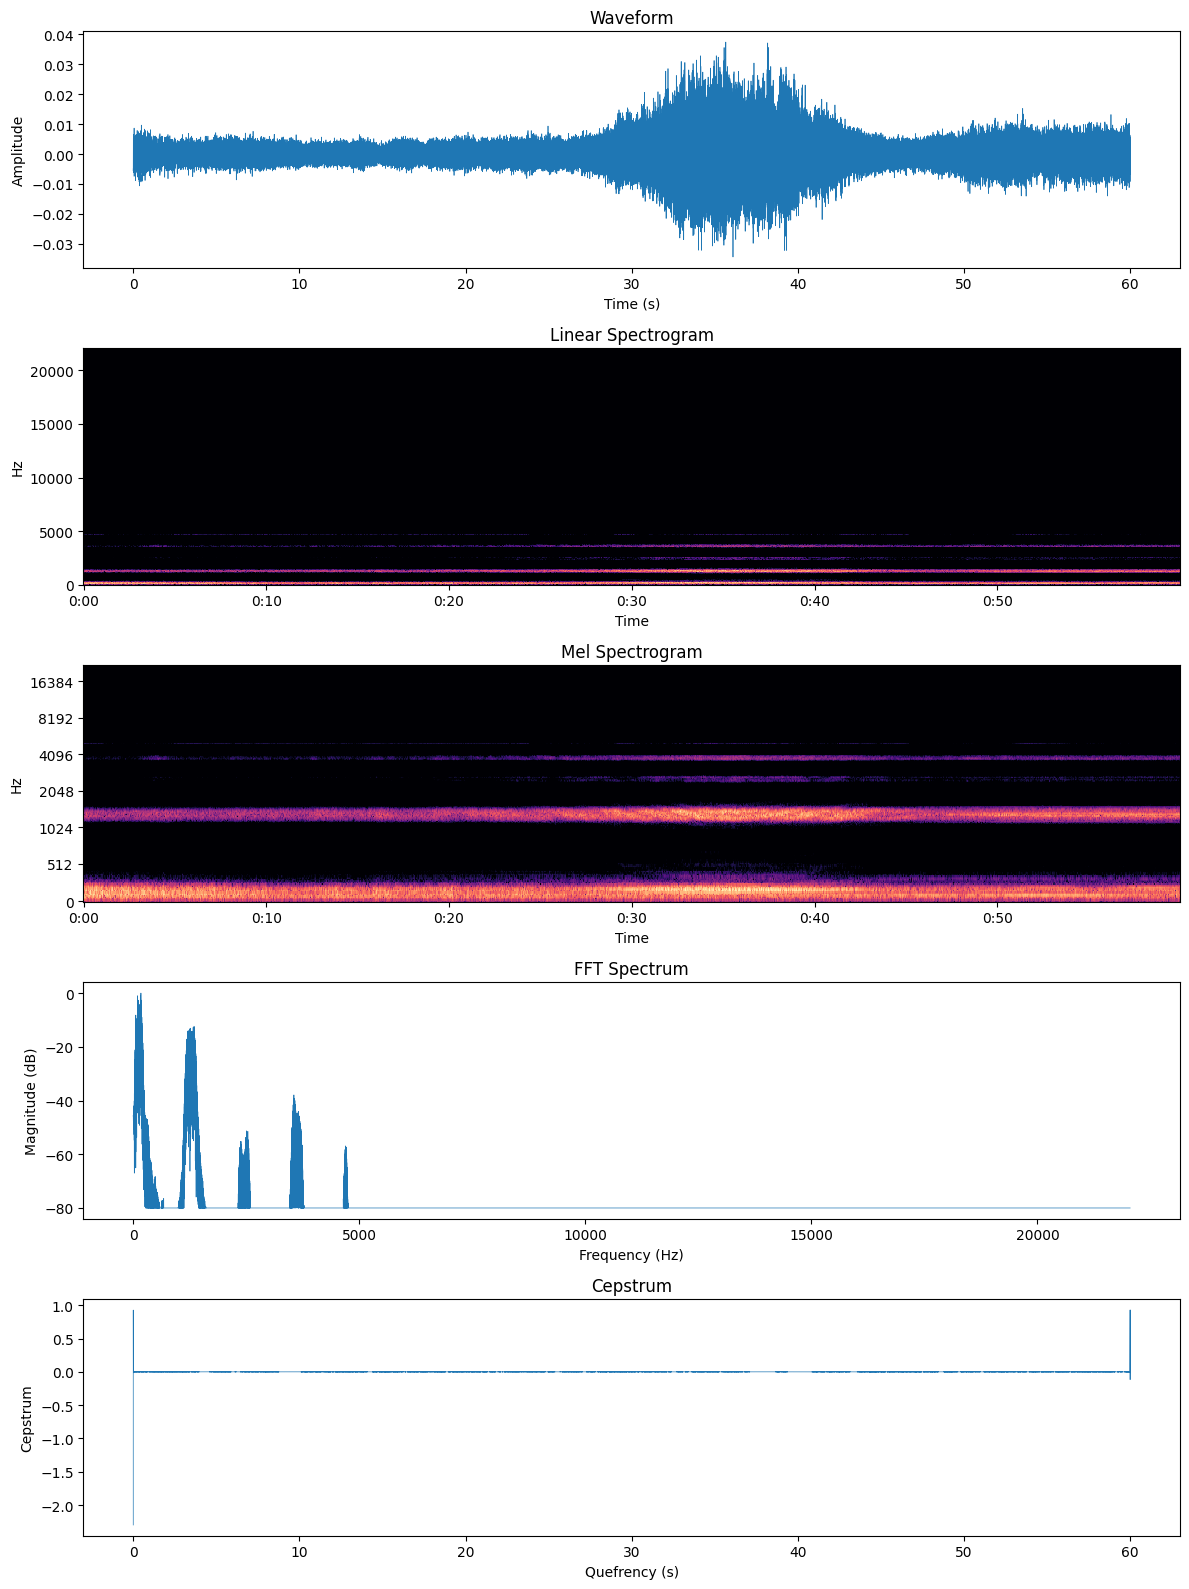

In [316]:
# Calculate time axis for waveform
time = np.arange(0, len(filtered_signal_combined)) / sr
# Compute spectrogram with linear frequency scale
D_linear = np.abs(librosa.stft(filtered_signal_combined))
spectrogram_linear = librosa.amplitude_to_db(D_linear, ref=np.max)

# Compute spectrogram with mel scale
S = librosa.feature.melspectrogram(y=filtered_signal_combined, sr=sr, n_mels=256, fmax=20000)
spectrogram_mel = librosa.power_to_db(S, ref=np.max)

# Compute FFT (Fast Fourier Transform) spectrum
fft = np.fft.fft(filtered_signal_combined)
fft_freqs = np.fft.fftfreq(len(fft), d=1/sr)
fft_mag = librosa.amplitude_to_db(np.abs(fft), ref=np.max)

# Compute Cepstrum
cepstrum = np.real(np.fft.ifft(np.log(np.abs(fft) + 1e-8)))

# Plotting
plt.figure(figsize=(12, 16))

# Plot waveform
plt.subplot(5, 1, 1)
plt.plot(time, y, linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')

# Plot linear spectrogram
plt.subplot(5, 1, 2)
librosa.display.specshow(spectrogram_linear, sr=sr, x_axis='time', y_axis='linear')
plt.title('Linear Spectrogram')

# Plot Mel spectrogram
plt.subplot(5, 1, 3)
librosa.display.specshow(spectrogram_mel, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel Spectrogram')

# Plot FFT spectrum
plt.subplot(5, 1, 4)
plt.plot(fft_freqs[:len(fft)//2], fft_mag[:len(fft)//2], linewidth=0.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('FFT Spectrum')

# Plot Cepstrum
plt.subplot(5, 1, 5)
plt.plot(time, cepstrum, linewidth=0.5)
plt.xlabel('Quefrency (s)')
plt.ylabel('Cepstrum')
plt.title('Cepstrum')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [184]:
print(y)

[ 0.00213565  0.00437771  0.00315997 ...  0.00031744 -0.02822151
 -0.03331881]


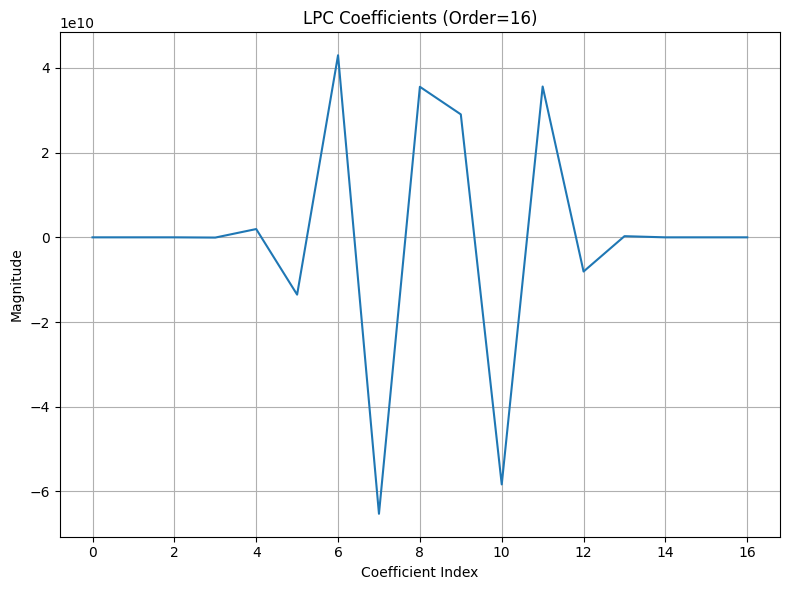

In [238]:
# Compute LPC coefficients
order = 16 # Example order
lpc_coeffs = librosa.lpc(y, order=order)

# Plot LPC coefficients
plt.figure(figsize=(8, 6))
plt.title(f'LPC Coefficients (Order={order})')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.plot(lpc_coeffs)
plt.grid(True)
plt.tight_layout()
plt.show()

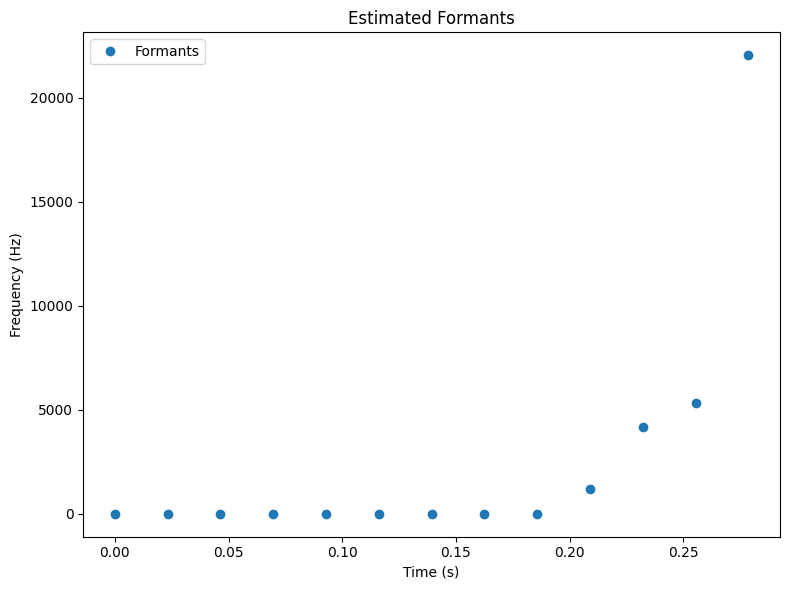

[    0.         0.         0.         0.         0.         0.
     0.         0.         0.      1174.0143  4178.1304  5328.659
 22050.    ]


In [309]:
# Estimate formants from LPC coefficients
roots = np.roots(lpc_coeffs)
roots = roots[np.imag(roots) >= 0]
formants = np.sort(np.angle(roots) * (sr / (2 * np.pi))) # Extract first 3 formants

# Create time axis
times = librosa.times_like(y)

# Plot formants over time
plt.figure(figsize=(8, 6))
plt.title('Estimated Formants')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.plot(times[:len(formants)], formants, 'o', label='Formants')
plt.legend()
plt.tight_layout()
plt.show()

print(formants)

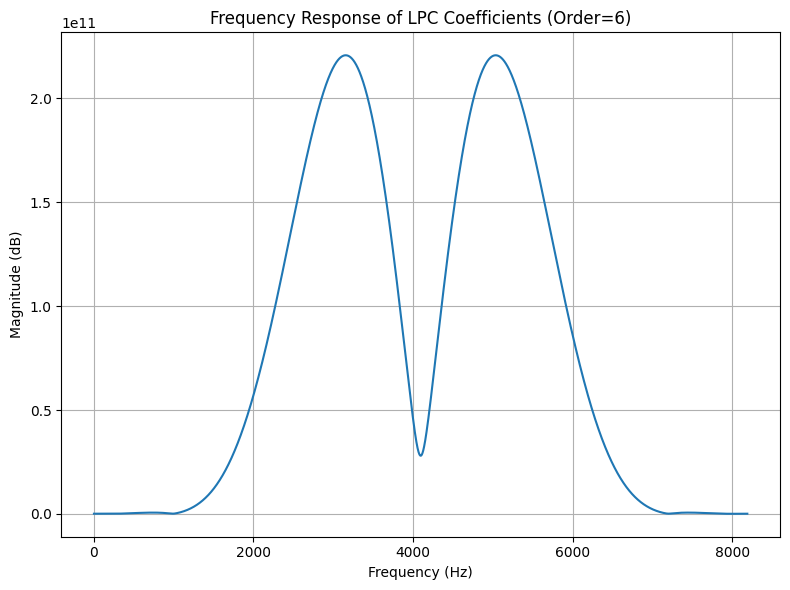

In [288]:
# Compute frequency response of LPC coefficients
freq_response = np.fft.fft(lpc_coeffs, n=8192)  # Compute FFT with higher resolution for visualization

# Plot frequency response
plt.figure(figsize=(8, 6))
plt.title(f'Frequency Response of LPC Coefficients (Order={order})')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.plot(np.abs(freq_response))
plt.grid(True)
plt.tight_layout()
plt.show()

In [310]:
formants = [f for f in set(formants) if f != 0 and f <= 4000]

In [314]:
harmonics_list = harmonics[1174.0142822265625]

# Convert lists to NumPy arrays and concatenate
harmonics_array = np.array(harmonics_list + list(set(formants) - set(harmonics_list)))

formants = harmonics_array
print(formants)

[  29.61665547   36.23331964   37.78331905 ... 4700.68155681 4709.36488686
 1174.01428223]


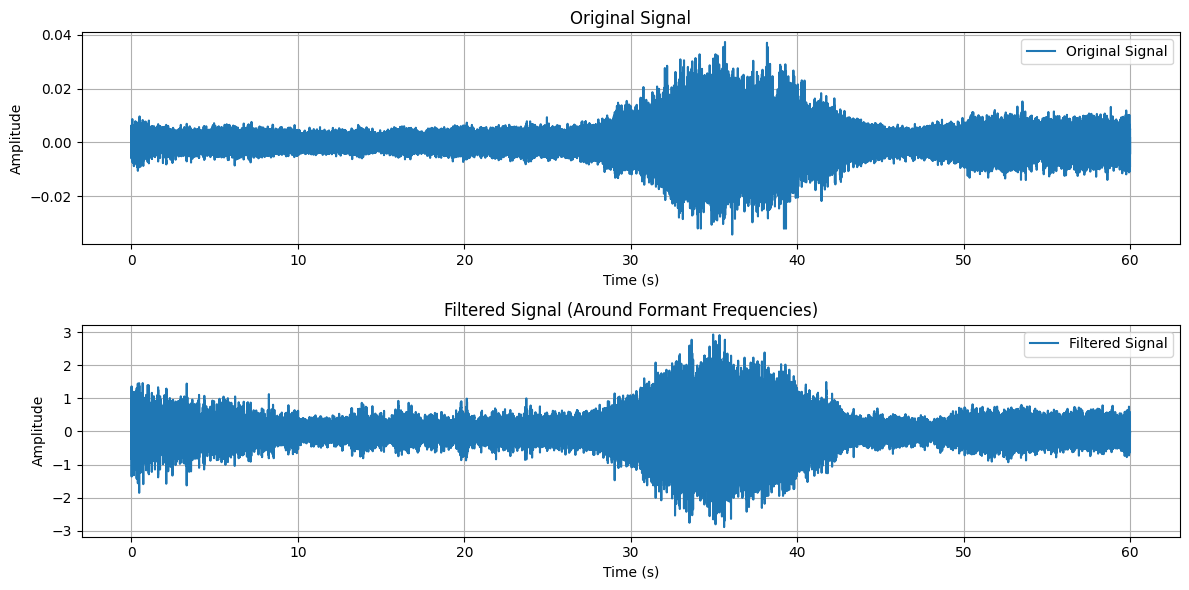

In [315]:
# Parameters for the bandpass filter
fs = 44100  # Sample rate of the signal (replace with your sample rate)
f_range = 29  # Frequency range (±100 Hz)

filtered_signals = []

# Design and apply bandpass filters for each formant frequency
for formant_freq in formants:
    lowcut = formant_freq - f_range
    highcut = formant_freq + f_range
    order = 2  # Filter order

    # Design a Butterworth bandpass filter
    b, a = butter(order, [lowcut / (fs / 2), highcut / (fs / 2)], btype='band')

    # Apply the filter to the signal using filtfilt for zero-phase filtering
    filtered_signal = filtfilt(b, a, y)
    filtered_signals.append(filtered_signal)

# Combine filtered signals (simple sum in this example)
filtered_signal_combined = np.sum(filtered_signals, axis=0)

# Plot original and filtered signals for comparison
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / fs, y, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(filtered_signal_combined)) / fs, filtered_signal_combined, label='Filtered Signal')
plt.title('Filtered Signal (Around Formant Frequencies)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Formant frequency: 1174.0142822265625 Hz, Harmonics: [29.616655473675177, 36.23331963971291, 37.78331905392326, 38.11665226128032, 38.59998541194807, 38.99998526077654, 40.34998475057265, 40.89998454271181, 41.49998431595453, 41.89998416478301, 42.36665065508289, 42.566650579497136, 42.833317145382786, 43.16665035273985, 43.33331695641838, 44.01665003150036, 44.349983238857426, 44.83331638952517, 45.58331610607856, 46.11664923784987, 46.33331582263196, 46.933315595874674, 47.18331550139248, 47.5999820105888, 47.76664861426734, 47.966648538681575, 48.233315104567225, 48.49998167045288, 48.69998159486712, 49.01664814185633, 49.33331468884554, 49.79998117914543, 49.99998110355967, 50.28331432981317, 50.483314254227416, 50.6666475182738, 50.84998078232019, 51.366647253723634, 51.86664706475923, 52.233313592852, 52.616646781312625, 52.81664670572687, 53.116646592348225, 53.333313177130314, 53.81664632779806, 54.099979554051565, 54.2999794784658, 54.51664606324789, 54.96664589317993, 55.1833

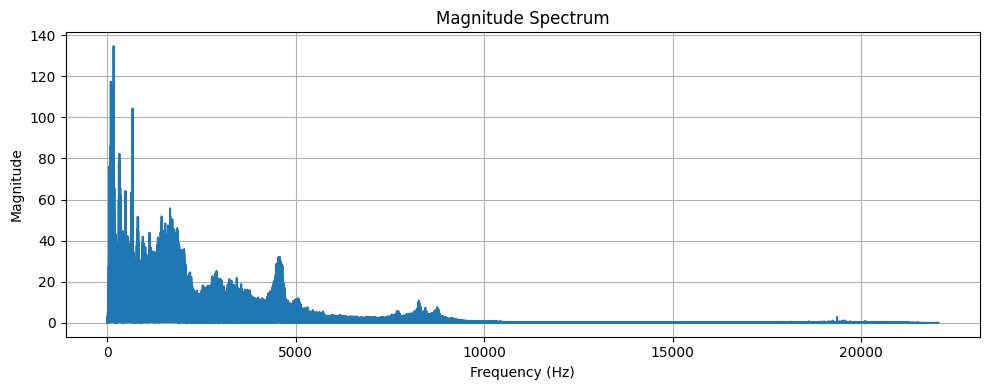

In [311]:
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
# Compute FFT and frequency vector
N = len(y)
freq = fftfreq(N, 1/fs)
fft_signal = fft(y)

# Plot the magnitude spectrum (optional)
plt.figure(figsize=(10, 4))
plt.plot(freq[:N//2], np.abs(fft_signal[:N//2]))
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

# Find harmonics of formants
harmonics = {}

for formant_freq in formants:
    # Search for peaks around each formant frequency
    formant_idx = np.argmin(np.abs(freq - formant_freq))
    peaks, _ = find_peaks(np.abs(fft_signal[:N//2]), height=0.1*np.max(np.abs(fft_signal[:N//2])), distance=10)
    
    # Identify harmonics (peaks near integer multiples of formant_freq)
    formant_harmonics = []
    for peak in peaks:
        peak_freq = freq[peak]
        if np.abs(peak_freq % formant_freq) < 200:  # Adjust the tolerance as needed
            formant_harmonics.append(peak_freq)
    
    # Store harmonics for each formant frequency
    harmonics[formant_freq] = formant_harmonics

# Print found harmonics
for formant_freq, formant_harmonics in harmonics.items():
    print(f"Formant frequency: {formant_freq} Hz, Harmonics: {formant_harmonics}")

plt.tight_layout()
plt.show()

In [312]:
print(len(harmonics[1174.0142822265625]))

1457


In [313]:
harmonics[1174.0142822265625]

[29.616655473675177,
 36.23331963971291,
 37.78331905392326,
 38.11665226128032,
 38.59998541194807,
 38.99998526077654,
 40.34998475057265,
 40.89998454271181,
 41.49998431595453,
 41.89998416478301,
 42.36665065508289,
 42.566650579497136,
 42.833317145382786,
 43.16665035273985,
 43.33331695641838,
 44.01665003150036,
 44.349983238857426,
 44.83331638952517,
 45.58331610607856,
 46.11664923784987,
 46.33331582263196,
 46.933315595874674,
 47.18331550139248,
 47.5999820105888,
 47.76664861426734,
 47.966648538681575,
 48.233315104567225,
 48.49998167045288,
 48.69998159486712,
 49.01664814185633,
 49.33331468884554,
 49.79998117914543,
 49.99998110355967,
 50.28331432981317,
 50.483314254227416,
 50.6666475182738,
 50.84998078232019,
 51.366647253723634,
 51.86664706475923,
 52.233313592852,
 52.616646781312625,
 52.81664670572687,
 53.116646592348225,
 53.333313177130314,
 53.81664632779806,
 54.099979554051565,
 54.2999794784658,
 54.51664606324789,
 54.96664589317993,
 55.18331247

In [330]:
y, sr = librosa.load("C:\\Users\Alec\Desktop\GriffinEMD\d306sA3r04SubsectionIMF\IMF_0.wav", sr= 44100)
y1, sr1 = librosa.load("C:\\Users\Alec\Desktop\GriffinEMD\d306sA3r04SubsectionIMF\IMF_2.wav", sr=44100)

In [335]:
y.shape

(1418364,)

In [331]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfcc2 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)

In [334]:
mfcc.shape

(13, 2771)

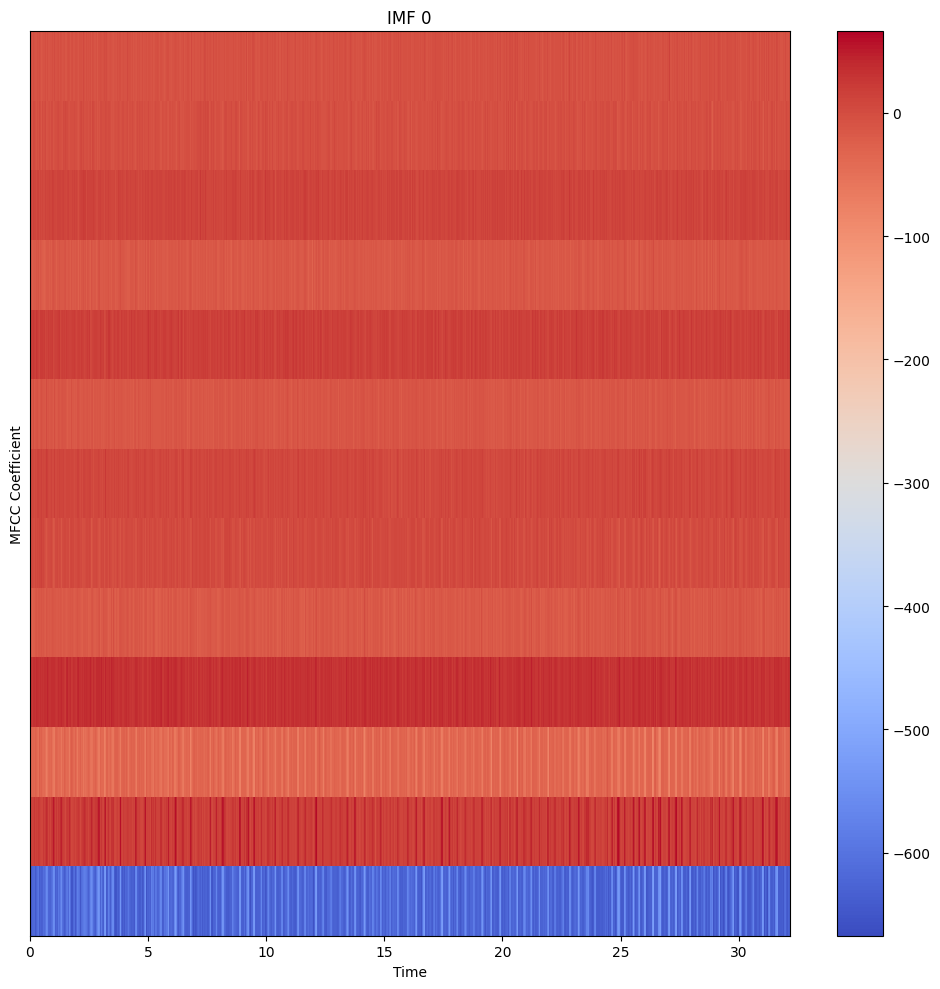

In [332]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('IMF 0')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficient')
plt.tight_layout()
plt.show()

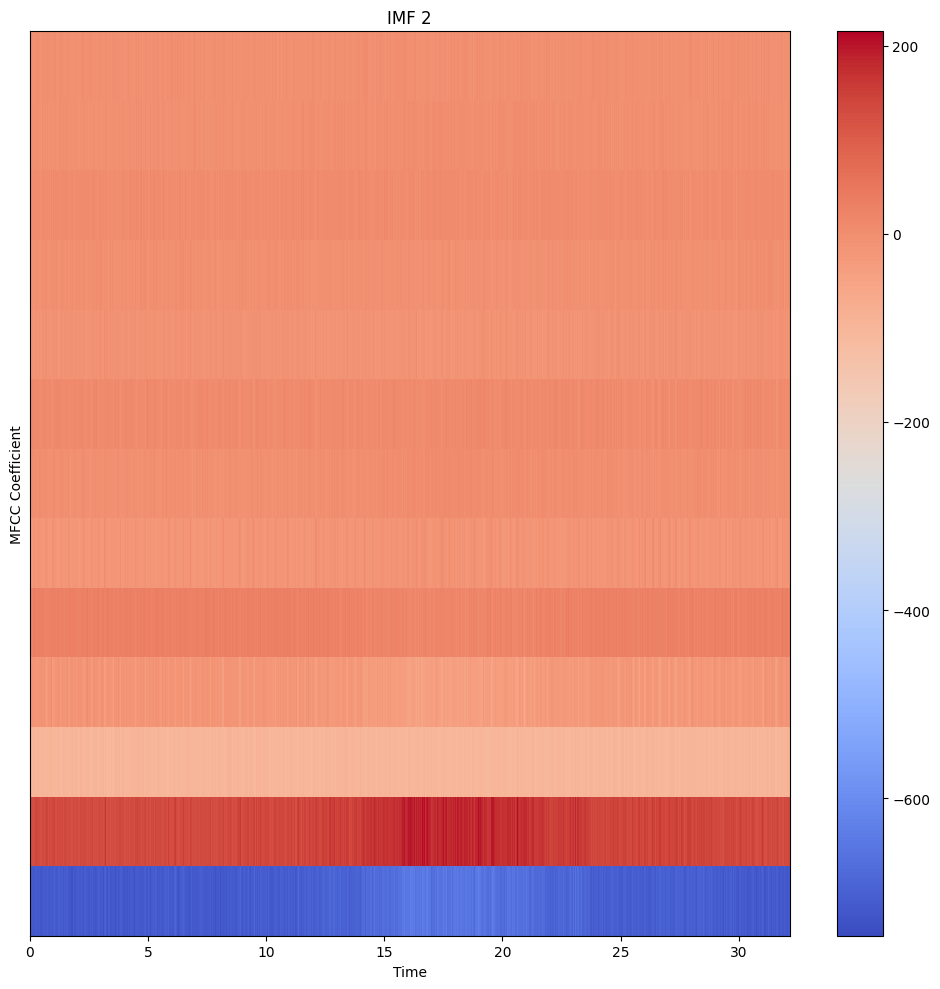

In [333]:
plt.figure(figsize=(10, 10))
librosa.display.specshow(mfcc2, x_axis='time', sr=sr)
plt.colorbar()
plt.title('IMF 2')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficient')
plt.tight_layout()
plt.show()

In [64]:
# output_file = f"C:\\Users\Alec\Desktop\\featureExtraction\cricket.wav"

# sf.write(output_file, y, sr)